#### Introduction

In [67]:
import pandas as pd

df = pd.read_csv("files_2/jounal_except_bugs.csv")

In [68]:
df.shape

(1649, 19)

In [69]:
df = df.set_index(['project', 'hash'])

In [70]:
#df = df[df['exception_bug']=='S']

In [71]:
df.head(2)

,,version,author,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue,has_buggy,exception_bug,symptom,root-cause,fix pattern,has_smell,has_test in_fix
project,hash,,,,,,,,,,,,,,,,,
spyder,9a430c766f8ccae10e9888eb709a61b96b74070a,0,1,issue,2,merge from 2.3: fix for issue #2991,Carlos Cordoba,2016-03-20 22:02:18-05:00,TRUE,"type:Bug,1 star",https://github.com/spyder-ide/spyder/issues/2,True,N,NaN,NaN,NaN,NaN,NaN
gensim,a7120d758b555853491e83175f3879a9e2552fcd,0,1,issue,1751,fix backward compatibility problem in phrases....,Alex Garel,2017-12-06 14:46:12+01:00,FALSE,bug,https://github.com/rare-technologies/gensim/is...,True,S,Aplication Crashing,Error in Logic,Remove the exception handling mechanism,NaN,NaN


#### Symptoms

In [72]:
df_msr = df

In [73]:
df_msr['symptom_adj'] = df_msr['symptom'].str.strip().str.replace('\n', '')

In [74]:
df_msr[df_msr['symptom_adj'].isna()]

,,version,author,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue,has_buggy,exception_bug,symptom,root-cause,fix pattern,has_smell,has_test in_fix,symptom_adj
project,hash,,,,,,,,,,,,,,,,,,
spyder,9a430c766f8ccae10e9888eb709a61b96b74070a,0,1,issue,2,merge from 2.3: fix for issue #2991,Carlos Cordoba,2016-03-20 22:02:18-05:00,TRUE,"type:Bug,1 star",https://github.com/spyder-ide/spyder/issues/2,True,N,NaN,NaN,NaN,NaN,NaN,NaN
erpnext,4e7613d4ce2194aada6f89d723f1971de115d2be,0,1,issue,20496,merge branch 'develop' into fix/github-issue/2...,Sagar Sharma,2022-11-24 20:43:52+05:30,TRUE,"bug,valid",https://github.com/frappe/erpnext/issues/20496,True,N,NaN,NaN,NaN,NaN,NaN,NaN
spyder,285180cf68f402526ceecdc849e05bf5d4f3c01a,0,1,issue,2,"merge from 2.3 (fix for issue #2064, issue #14...",Carlos Cordoba,2015-01-10 14:18:40-05:00,TRUE,"type:Bug,1 star",https://github.com/spyder-ide/spyder/issues/2,True,N,NaN,NaN,NaN,NaN,NaN,NaN
awx,711c1824a37af2bb7d6f3694325a3f79a4f1baea,0,1,issue,1112,fix issue ac-1112... disallow multiple dtstart...,Matthew Jones,2014-04-03 13:14:11-04:00,FALSE,"type:bug,component:ui",https://github.com/ansible/awx/issues/1112,True,N,NaN,NaN,NaN,NaN,NaN,NaN
redis-py,428d60940f386d3680a413aa327889308f82c5de,0,1,issue,2540,fix issue 2540: synchronise concurrent command...,Vivanov98,2023-01-29 13:48:50+00:00,FALSE,"bug,async",https://github.com/andymccurdy/redis-py/issues...,True,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gamestonkterminal,50cafd500ece43df98e3cf076d81084b2806ea03,1,7,issue,1481,discord bot massive improvement (#1481)\n\n* a...,teh_coderer,2022-03-16 05:21:27-05:00,FALSE,"bug,feat XL,discord",https://github.com/gamestonkterminal/gamestonk...,True,N,NaN,NaN,NaN,NaN,NaN,NaN
aws-cli,a026913ea3689f454fc349137b54657e72aa0a7e,1,7,issue,8,merge branch 'convert-cloudtrail' into develop...,James Saryerwinnie,2015-03-02 10:39:07-08:00,TRUE,bug,https://github.com/aws/aws-cli/issues/8,True,N,NaN,NaN,NaN,NaN,NaN,NaN
glances,d8bdef221d931b010a40ec491780e0fed186e861,1,7,issue,157,"fix for issues #157, #158 and #164",asergi,2013-01-20 15:25:25+01:00,FALSE,bug,https://github.com/nicolargo/glances/issues/157,True,N,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_msr.loc[:, ['symptom','symptom_adj']].drop_duplicates().to_csv("files_2/symptoms.csv", index=False)

In [76]:
def map_values_from_csv(csv_path, df, column):
    # Load the CSV file into a DataFrame
    mapping_df = pd.read_csv(csv_path)

    map_columns = ['map', 'grp']

    for map_column in map_columns:

        # Create a dictionary from the CSV mapping DataFrame
        mapping_dict = dict(zip(mapping_df['adj'], mapping_df[map_column]))

        # Create a new column in the original DataFrame
        df[f"{column}_{map_column}"] = df[f"{column}_adj"].map(mapping_dict)

        # If the string is not in the mapping, use the original value
        df[column].fillna(df[f"{column}_{map_column}"], inplace=True)

    return df

In [77]:
df_rq1 = map_values_from_csv("files_2/symptoms_adj.csv", df_msr[df_msr['exception_bug'] == "S"].copy(), "symptom")

df_rq1 = df_rq1.groupby(["symptom_grp"]).size().reset_index(name='Count')

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_horizontal_bar(df, category_column, value_column, label_x, label_y, title):
    # Create a horizontal bar plot using Seaborn
    df = df.sort_values(value_column, ascending=False)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

     # Define a custom color palette with light colors
    custom_palette = sns.color_palette("pastel").as_hex()
    
    ax = sns.barplot(x=value_column, y=category_column, data=df) #viridis

    # Add labels and title
    plt.xlabel(label_x, fontsize=10, fontweight='bold')
    plt.ylabel(label_y, fontsize=10, fontweight='bold')
    if title is not None:
        plt.title(title)

    # Increase font size and put labels in bold for both axes
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12) # fontweight='bold')

     # Set explicit tick locations and labels for both axes
    # ax.set_xticks(range(0, 101, 10))
    # ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold')

    # Add percentage labels on each bar
    for index, value in enumerate(df[value_column]):
        ax.text(value, index, f'{value:.2f}%', ha='left', va='center', color='black', fontweight='bold')


    # Show the plot
    plt.show()

In [79]:
df_msr["exception_bug"].unique()

array(['N', 'S'], dtype=object)

In [80]:
df_rq1

,symptom_grp,Count
0,Aplication Crashing,115
1,Compilation Error,3
2,Database Error,1
3,Deadlock,1
4,Errors in CI,31
5,External API Change,5
6,Import Error,2
7,Incorrect Behavior,211
8,Incorrect Exceptions,465
9,Incorrect Messaging,86


In [81]:
df_rq1['Percentage'] = (df_rq1['Count'] / len(df_msr[df_msr['exception_bug'] == "S"])) * 100
df_rq1['Percentage'] = df_rq1['Percentage'].round(2)
df_rq1.sort_values("Count", ascending=False)

,symptom_grp,Count,Percentage
8,Incorrect Exceptions,465,49.36
7,Incorrect Behavior,211,22.40
0,Aplication Crashing,115,12.21
9,Incorrect Messaging,86,9.13
4,Errors in CI,31,3.29
11,Performance,16,1.70
5,External API Change,5,0.53
1,Compilation Error,3,0.32
10,Modules Error,3,0.32
6,Import Error,2,0.21


In [82]:
df_rq1['Count'].sum()

942

In [83]:
df_rq1.to_csv("files_2/symptoms.csv")

/tmp/ipykernel_1201/3819338574.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


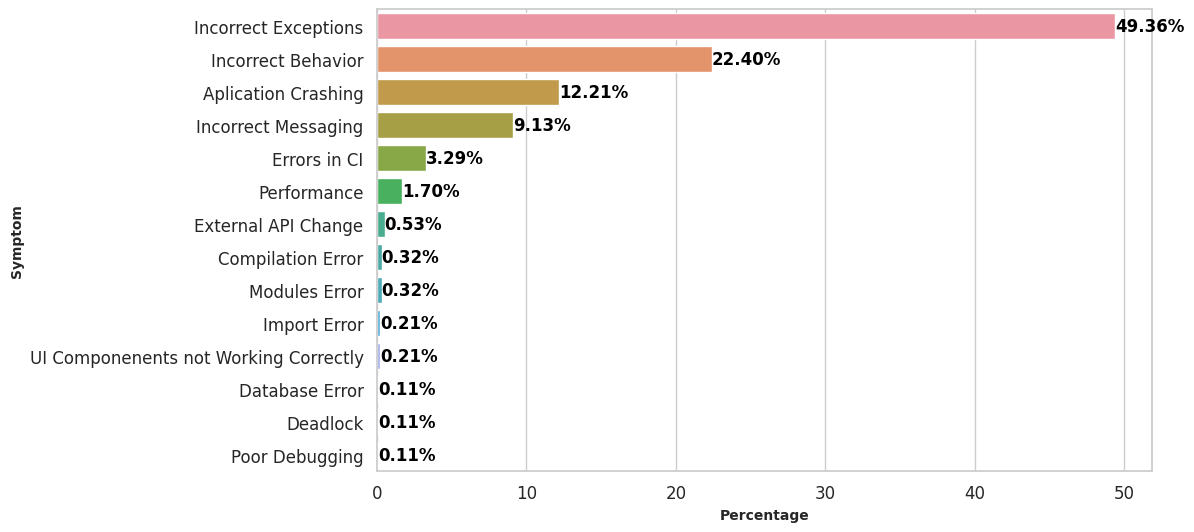

In [84]:
plot_horizontal_bar(df_rq1, category_column='symptom_grp', value_column='Percentage', label_x="Percentage", label_y="Symptom", title=None) 

#### Root Causes

In [85]:
df_msr = df_msr.rename(columns={'root-cause': 'root_cause'})

In [86]:
df_msr['root_cause_adj'] = df_msr['root_cause'].str.strip().str.replace('\n', '')

In [87]:
df_msr.loc[:, ['root_cause', 'root_cause_adj']]

,,root_cause,root_cause_adj
project,hash,,
spyder,9a430c766f8ccae10e9888eb709a61b96b74070a,NaN,NaN
gensim,a7120d758b555853491e83175f3879a9e2552fcd,Error in Logic,Error in Logic
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,Badly defined arguments,Badly defined arguments
erpnext,4e7613d4ce2194aada6f89d723f1971de115d2be,NaN,NaN
spyder,285180cf68f402526ceecdc849e05bf5d4f3c01a,NaN,NaN
...,...,...,...
glances,d8bdef221d931b010a40ec491780e0fed186e861,NaN,NaN
salt,c4e5c130daa4f49d33d96b3fea1d69feac28b2d4,Unhandled Exception,Unhandled Exception
spyder,cfe1bc022e911115b030bc3f4d898312419bef1e,Unhandled Exception,Unhandled Exception


In [88]:
df_msr.root_cause_adj.unique()

array([nan, 'Error in Logic', 'Badly defined arguments',
       'Unhandled Exception', 'Missing Raising Condition',
       'Re-raising exception', 'Improper Handling',
       'Wrong exception type', 'API Mismatch', 'Unproper Message Error',
       'Incorrect logic leading to raise a execption',
       'Incorrect code logic', 'Bad Exception Handling Logic',
       'No Exception Handling', 'and Unproper Message Error',
       'Missing exception type', '-', 'Unexpected Raising',
       'Unproper exception handling', 'Aplication Crashing',
       'Error in logic', 'Improper handling',
       'Wrong exception type e Unproper Message Error (Utilizava Generic Exception)',
       'Unproper MessageError Due toUnhandled Exception',
       'Unhandled Error', 'Missing finally',
       'Exception handled incorrectly', 'Wrong Assertion', 'Lib conflict',
       'Additional Unhandled Exception', 'String manipulation issue',
       'Unicode string error', 'Unparsable indent source unhandled',
       'S

In [89]:
df_msr.loc[:, ['root_cause','root_cause_adj']].drop_duplicates().to_csv("files_2/root_causes.csv", index=False)

In [90]:
df_rq2 = map_values_from_csv("files_2/root_causes_adj.csv", df_msr[df_msr['exception_bug'] == "S"].copy(), "root_cause")

In [91]:
df_rq2.head(5)

,,version,author,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue,...,exception_bug,symptom,root_cause,fix pattern,has_smell,has_test in_fix,symptom_adj,root_cause_adj,root_cause_map,root_cause_grp
project,hash,,,,,,,,,,,,,,,,,,,,,
gensim,a7120d758b555853491e83175f3879a9e2552fcd,0,1,issue,1751,fix backward compatibility problem in phrases....,Alex Garel,2017-12-06 14:46:12+01:00,FALSE,bug,https://github.com/rare-technologies/gensim/is...,...,S,Aplication Crashing,Error in Logic,Remove the exception handling mechanism,NaN,NaN,Aplication Crashing,Error in Logic,Incorrect Logic,Incorrect Logic
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,0,1,issue,514,"graphql: fix a bug in 'first', 'last', 'after'...",Victor Petrovykh,2019-03-21 14:55:58-04:00,FALSE,"bug,graphql",https://github.com/edgedb/edgedb/issues/514,...,S,Invalid Arguments,Badly defined arguments,Handling error messages for invalid arguments,NaN,NaN,Invalid Arguments,Badly defined arguments,Incorrect Logic,Incorrect Logic
pillow,2d06d8550fb8823220d776cb56af98106a9cee51,0,1,issue,2359,merge pull request #2359 from wiredfool/issue_...,wiredfool,2017-01-26 14:12:32+00:00,TRUE,Bug,https://github.com/python-pillow/pillow/issues...,...,S,Exceptional error,Unhandled Exception,Add a exception handling block,NaN,NaN,Exceptional error,Unhandled Exception,Missing Exception Type,Improper Exception Handling
pandas,eae588d2b20af5ece4e98c35b37252144e6589be,0,1,issue,1778,bug: fix date_range generation issues with dst...,Wes McKinney,2012-08-18 19:35:32-04:00,FALSE,Bug,https://github.com/pandas-dev/pandas/issues/1778,...,S,DatetimeIndex error,Error in Logic,mover o tratamento de exceçãopara outro lugar,NaN,NaN,DatetimeIndex error,Error in Logic,Incorrect Logic,Incorrect Logic
pytorch-lightning,c521624a928b2665965830590b2f37b347a86c43,0,1,issue,8167,NaN,thomas chaton,2021-06-28 20:26:03+01:00,FALSE,"bug,ready,distributed",https://github.com/pytorchlightning/pytorch-li...,...,S,Deadlock,Unhandled Exception,Add a exception handling block / Raise a excep...,NaN,NaN,Deadlock,Unhandled Exception,Missing Exception Type,Improper Exception Handling


In [92]:
df_rq2 = df_rq2.groupby(["root_cause_grp", "root_cause_map"]).size().reset_index(name='Count')

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_horizontal_bar(df, category_column, value_column, label_x, label_y, title):
    # Create a horizontal bar plot using Seaborn
    df = df.sort_values(value_column, ascending=False)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

     # Define a custom color palette with light colors
    custom_palette = sns.color_palette("pastel").as_hex()
    
    ax = sns.barplot(x=value_column, y=category_column, data=df) #viridis

    # Add labels and title
    plt.xlabel(label_x, fontsize=10, fontweight='bold')
    plt.ylabel(label_y, fontsize=10, fontweight='bold')
    if title is not None:
        plt.title(title)

    # Increase font size and put labels in bold for both axes
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=12) # fontweight='bold')

     # Set explicit tick locations and labels for both axes
    # ax.set_xticks(range(0, 101, 10))
    # ax.set_yticklabels(ax.get_yticklabels(), fontsize=10, fontweight='bold')

    # Add percentage labels on each bar
    for index, value in enumerate(df[value_column]):
        ax.text(value, index, f'{value:.2f}%', ha='left', va='center', color='black', fontweight='bold')


    # Show the plot
    plt.show()

In [94]:
df_rq2

,root_cause_grp,root_cause_map,Count
0,API Errors,API Misuse,11
1,API Errors,Incorrect API Version,7
2,EH Anti-Patterns,Bare Except,1
3,EH Anti-Patterns,Generic Exception,2
4,EH Anti-Patterns,Generic Raise,1
5,EH Anti-Patterns,Swallowing Exception,2
6,Import Error,Import Error,9
7,Improper Exception Handling,Missing Exception Type,476
8,Improper Exception Handling,Wrong Exception Type,14
9,Improper Finally Block,Finally Block Should not Exists,1


In [95]:
df_rq2['Percentage'] = (df_rq2['Count'] / len(df_msr[df_msr['exception_bug'] == "S"])) * 100
df_rq2.sort_values(by="Count", ascending=False)

,root_cause_grp,root_cause_map,Count,Percentage
7,Improper Exception Handling,Missing Exception Type,476,50.530786
15,Incorrect Logic,Incorrect Logic,206,21.868365
12,Improper Raising,Missing Raising Condition,99,10.509554
18,Unproper Message,Unproper Message,62,6.581741
17,Re-raising exception,Re-raising exception,19,2.016985
8,Improper Exception Handling,Wrong Exception Type,14,1.486200
14,Improper Raising,Wrong Raise Type,14,1.486200
13,Improper Raising,Unexpected Raising,13,1.380042
0,API Errors,API Misuse,11,1.167728
6,Import Error,Import Error,9,0.955414


In [96]:
#plot_horizontal_bar(df_rq1, category_column='symptom_map', value_column='Count', label_x="Percentage", label_y="Symptom", title=None) 

In [97]:
import pandas as pd
from tabulate import tabulate

def dataframe_to_latex_with_bookmarks(df):
    # Convert the DataFrame to a LaTeX table
    latex_table = tabulate(df, tablefmt='latex', headers='keys', showindex=False)

    # Create LaTeX code with bookmarks
    latex_code = f"""
\\section{{Table}}
{latex_table}
"""

    return latex_code

In [98]:
df_rq2['Percentage'] = df_rq2['Percentage'].round(2)
df_rq2.sort_values(by=["root_cause_grp", "Count"], ascending=False)

,root_cause_grp,root_cause_map,Count,Percentage
18,Unproper Message,Unproper Message,62,6.58
17,Re-raising exception,Re-raising exception,19,2.02
16,Python 2/3 Incompatibility Errors,Python 2/3 Incompatibility Errors,3,0.32
15,Incorrect Logic,Incorrect Logic,206,21.87
12,Improper Raising,Missing Raising Condition,99,10.51
14,Improper Raising,Wrong Raise Type,14,1.49
13,Improper Raising,Unexpected Raising,13,1.38
9,Improper Finally Block,Finally Block Should not Exists,1,0.11
10,Improper Finally Block,Missing Finally Block,1,0.11
11,Improper Finally Block,Missing Type on Finally Block,1,0.11


In [99]:
df_rq2['Count'].sum()

942

In [100]:
df_rq2.to_csv("files_2/root_causes.csv")

/tmp/ipykernel_1201/3819338574.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)


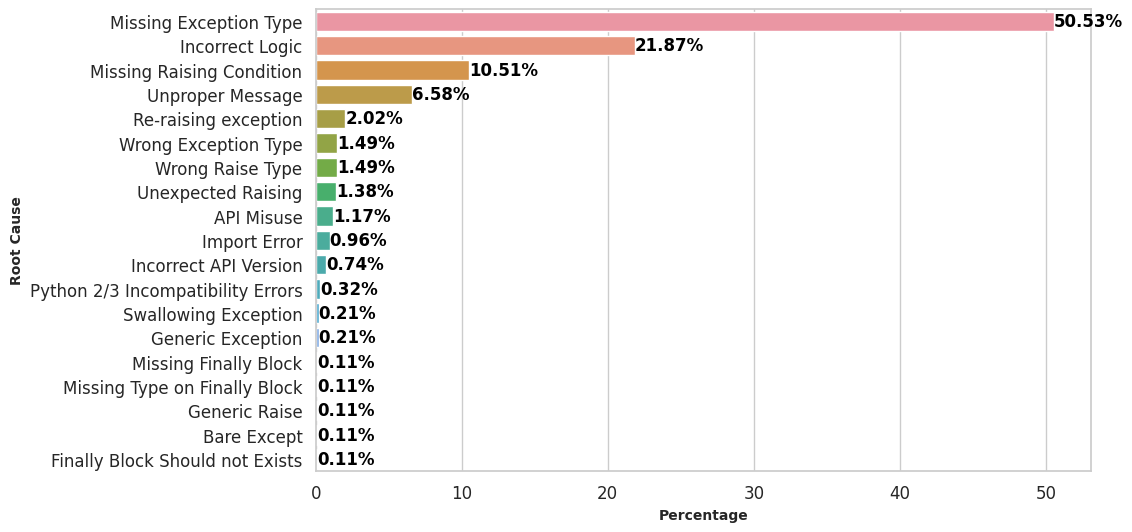

In [101]:
plot_horizontal_bar(df_rq2, category_column='root_cause_map', value_column='Percentage', label_x="Percentage", label_y="Root Cause", title=None) 

#### Fixes

In [299]:
df_msr.columns

Index(['version', 'author', 'type', 'issue_number', 'commit_msg',
       'author_name', 'author_date', 'merge', 'issue_labels', 'url_issue',
       'has_buggy', 'exception_bug', 'symptom', 'root_cause', 'fix pattern',
       'has_smell', 'has_test in_fix', 'symptom_adj', 'root_cause_adj'],
      dtype='object')

In [300]:
df_msr = df_msr.rename(columns={'fix pattern': 'fix'})

In [301]:
df_msr['fix_adj'] = df_msr['fix'].str.strip().str.replace('\n', '')

In [302]:
df_msr.loc[:, ['fix', 'fix_adj']]

,,fix,fix_adj
project,hash,,
spyder,9a430c766f8ccae10e9888eb709a61b96b74070a,NaN,NaN
gensim,a7120d758b555853491e83175f3879a9e2552fcd,Remove the exception handling mechanism,Remove the exception handling mechanism
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,Handling error messages for invalid arguments,Handling error messages for invalid arguments
erpnext,4e7613d4ce2194aada6f89d723f1971de115d2be,NaN,NaN
spyder,285180cf68f402526ceecdc849e05bf5d4f3c01a,NaN,NaN
...,...,...,...
glances,d8bdef221d931b010a40ec491780e0fed186e861,NaN,NaN
salt,c4e5c130daa4f49d33d96b3fea1d69feac28b2d4,Handle a Exception,Handle a Exception
spyder,cfe1bc022e911115b030bc3f4d898312419bef1e,Add a try-except block,Add a try-except block


In [303]:
df_msr.fix_adj.unique()

array([nan, 'Remove the exception handling mechanism',
       'Handling error messages for invalid arguments',
       'Add a exception handling block',
       'mover o tratamento de exceçãopara  outro lugar',
       'Add a exception handling block / Raise a exception',
       'Raise\xa0a\xa0exception', 'Handle a exception',
       'Change the exception type', 'Change to a specific exception.',
       'Change to apropriated exception type',
       'Change the exception tests assertions', 'Raise a error',
       'Raise a exception', 'Change to a specific exceptio',
       'Raise an error', 'Change the message error',
       'Use exception handling mechanism to change the logic',
       'improvement in error message',
       'improvement in code logic and error message',
       'Improvement Exception Handling', 'Add Exception Handling',
       'Add apropriated exception type', 'and Change the message error',
       'Add the exception type', '-',
       'Add an apropriated exception handli

In [304]:
df_msr.loc[:, ['fix','fix_adj']].drop_duplicates().to_csv("files_2/fixes.csv", index=False)

In [305]:
df_rq4 = map_values_from_csv("files_2/fixes_adj.csv", df_msr[df_msr['exception_bug'] == "S"].copy(), "fix")

In [306]:
df_rq4.head(2)

,,version,author,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue,...,symptom,root_cause,fix,has_smell,has_test in_fix,symptom_adj,root_cause_adj,fix_adj,fix_map,fix_grp
project,hash,,,,,,,,,,,,,,,,,,,,,
gensim,a7120d758b555853491e83175f3879a9e2552fcd,0,1,issue,1751,fix backward compatibility problem in phrases....,Alex Garel,2017-12-06 14:46:12+01:00,FALSE,bug,https://github.com/rare-technologies/gensim/is...,...,Aplication Crashing,Error in Logic,Remove the exception handling mechanism,NaN,NaN,Aplication Crashing,Error in Logic,Remove the exception handling mechanism,Remove the exception handling block,Improve the exception handling block
edgedb,a4dc14a01b1a2abfe05246d975b6d32cae8b40f2,0,1,issue,514,"graphql: fix a bug in 'first', 'last', 'after'...",Victor Petrovykh,2019-03-21 14:55:58-04:00,FALSE,"bug,graphql",https://github.com/edgedb/edgedb/issues/514,...,Invalid Arguments,Badly defined arguments,Handling error messages for invalid arguments,NaN,NaN,Invalid Arguments,Badly defined arguments,Handling error messages for invalid arguments,Improve the message error,Improve the message error


In [307]:
df_rq4 = df_rq4.groupby(["fix_map", "fix_grp"]).size().reset_index(name='Count')

In [308]:
df_rq4

,fix_map,fix_grp,Count
0,Add a Swallowing Exception,EH Anti-Patterns,3
1,Add a exception handling block,Improve the exception handling block,291
2,Add a exception handling block and raise a exc...,Improve the exception handling block,6
3,Add a finally mechanism,Improve the Finally Mechanism,3
4,Add a raise condition,Improve raising conditions,155
5,Add apropriated exception type,Improve the exception handling block,17
6,Add apropriated exception type and add a raise...,Improve the exception handling block,1
7,Change exception to generic type,EH Anti-Patterns,2
8,Change the exception type and raise a exception,Improve raising conditions,1
9,Change the raise type,Improve raising conditions,17


In [309]:
df_rq4['Percentage'] = (df_rq4['Count'] / len(df_msr[df_msr['exception_bug'] == "S"])) * 100
df_rq4

,fix_map,fix_grp,Count,Percentage
0,Add a Swallowing Exception,EH Anti-Patterns,3,0.318471
1,Add a exception handling block,Improve the exception handling block,291,30.891720
2,Add a exception handling block and raise a exc...,Improve the exception handling block,6,0.636943
3,Add a finally mechanism,Improve the Finally Mechanism,3,0.318471
4,Add a raise condition,Improve raising conditions,155,16.454352
5,Add apropriated exception type,Improve the exception handling block,17,1.804671
6,Add apropriated exception type and add a raise...,Improve the exception handling block,1,0.106157
7,Change exception to generic type,EH Anti-Patterns,2,0.212314
8,Change the exception type and raise a exception,Improve raising conditions,1,0.106157
9,Change the raise type,Improve raising conditions,17,1.804671


In [311]:
df_rq4['Percentage'] = df_rq4['Percentage'].round(2)
df_rq4 = df_rq4.sort_values(by=["fix_grp", "Count"], ascending=False)

df_rq4

,fix_map,fix_grp,Count,Percentage
19,Re-raise a exception,Re-raise a exception,11,1.17
27,Workaround to fix Python 2/3 incompatibility e...,Python version incompatibility errors,1,0.11
16,Improve the message error,Improve the message error,51,5.41
1,Add a exception handling block,Improve the exception handling block,291,30.89
25,Remove the exception handling block,Improve the exception handling block,39,4.14
5,Add apropriated exception type,Improve the exception handling block,17,1.80
20,Refactor the exception handling block,Improve the exception handling block,14,1.49
17,Move the exception handling block to another part,Improve the exception handling block,14,1.49
2,Add a exception handling block and raise a exc...,Improve the exception handling block,6,0.64
22,Remove a specific exception type,Improve the exception handling block,2,0.21


In [163]:
dataframe_to_latex_with_bookmarks(df_rq4)

'\n\\section{Table}\n\\begin{tabular}{lrr}\n\\hline\n fix\\_map                                                  &   Count &   Percentage \\\\\n\\hline\n Add a exception handling block                           &     291 &        30.89 \\\\\n Add a raise condition                                    &     155 &        16.45 \\\\\n Change to apropriated exception type                     &     138 &        14.65 \\\\\n Change the the exception code logic                      &      81 &         8.6  \\\\\n Handle an exception type                                 &      67 &         7.11 \\\\\n Improve the message error                                &      51 &         5.41 \\\\\n Remove the exception handling block                      &      39 &         4.14 \\\\\n Add apropriated exception type                           &      17 &         1.8  \\\\\n Change the raise type                                    &      17 &         1.8  \\\\\n Refactor the exception handling block        

In [312]:
df_rq4['Count'].sum()

942

In [313]:
df_rq4.to_csv("files_2/fixes.csv")

#### Root Causes vs Symptoms

In [86]:
df_msr.columns

Index(['version', 'author', 'type', 'issue_number', 'commit_msg',
       'author_name', 'author_date', 'merge', 'issue_labels', 'url_issue',
       'has_buggy', 'exception_bug', 'symptom', 'root_cause', 'fix',
       'has_smell', 'has_test in_fix', 'symptom_adj', 'root_cause_adj',
       'fix_adj'],
      dtype='object')

In [84]:
df_stacked_rq4 = df_msr.groupby(by=['symptom_grp', 'root_cause_grp']).size().reset_index(name='Count')

KeyError: 'symptom_grp'

In [ ]:
df_stacked_rq4.head(5)

,symptom_grp,root_cause_grp,Count
0,Aplication Crashing,API Misuse,1
1,Aplication Crashing,Improper Exception Handling,21
2,Aplication Crashing,Improper Finally Mechanism,1
3,Aplication Crashing,Improper Raising,6
4,Aplication Crashing,Incorrect Logic,7


#### Fixes vs Root Causes

In [ ]:
df_msr.columns

Index(['author', 'type', 'issue_number', 'commit_msg', 'author_name',
       'author_date', 'merge', 'issue_labels', 'url_issue', 'has_buggy',
       'exception_bug', 'symptom', 'root_cause', 'fix', 'has_smell',
       'has_test in_fix', 'symptom_adj', 'symptom_map', 'symptom_grp',
       'root_cause_adj', 'root_cause_map', 'root_cause_grp', 'fix_adj',
       'fix_map', 'fix_grp'],
      dtype='object')

In [ ]:
df_stacked_rq5 = df_msr.groupby(by=['root_cause_grp', 'fix_grp']).size().reset_index(name='Count')

In [ ]:
df_stacked_rq5.head(5)

,root_cause_grp,fix_grp,Count
0,API Misuse,Import with a exception handling code,1
1,API Misuse,Improve raising conditions,2
2,API Misuse,Improve the exception handling block,5
3,Improper Exception Handling,Change the the exception code logic,1
4,Improper Exception Handling,Handle a exception,13


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stacked_bar(df, x_col, y_col, value_col):
    # Pivot the DataFrame to have 'x_col' as index, 'y_col' as columns, and 'value_col' as values
    pivot_df = df.pivot(index=x_col, columns=y_col, values=value_col).fillna(0)

    # Create a custom color palette
    custom_palette = sns.color_palette("husl", len(df[y_col].unique()))

    # Create a stacked bar plot using Seaborn with a gray background
    sns.set(style="whitegrid", rc={"axes.facecolor": "#f2f2f2"})
    plt.figure(figsize=(12, 8))
    ax = pivot_df.plot(kind='barh', stacked=True, edgecolor='w')

    # Add labels and title with a smaller font size
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title("Stacked Bar Plot", fontsize=16, fontweight='bold')

    # Display values on the bars with a smaller font size
    for p in ax.patches:
        width = p.get_width()
        plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', color='black', fontsize=8)

    # Show the legend with a smaller font size
    plt.legend(title=y_col, bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

    # Show the plot
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_stacked_bar(df, x_col, y_col, value_col):
    # Pivot the DataFrame to have 'x_col' as index, 'y_col' as columns, and 'value_col' as values
    pivot_df = df.pivot(index=x_col, columns=y_col, values=value_col).fillna(0)

    # Create a custom color palette
    custom_palette = sns.color_palette("husl", len(df[y_col].unique()))

    # Create a stacked bar plot using Seaborn with a gray background
    sns.set(style="whitegrid", rc={"axes.facecolor": "#f2f2f2"})
    plt.figure(figsize=(12, 8))
    ax = pivot_df.plot(kind='barh', stacked=True, edgecolor='w')

    # Add labels and title with a smaller font size
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title("Stacked Bar Plot", fontsize=16, fontweight='bold')

    # Display values on the bars with a smaller font size
    for p in ax.patches:
        width = p.get_width()
        plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', color='black', fontsize=8)

    # Show the legend with a smaller font size
    plt.legend(title=y_col, bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

    # Show the plot
    plt.show()


<Figure size 1200x800 with 0 Axes>

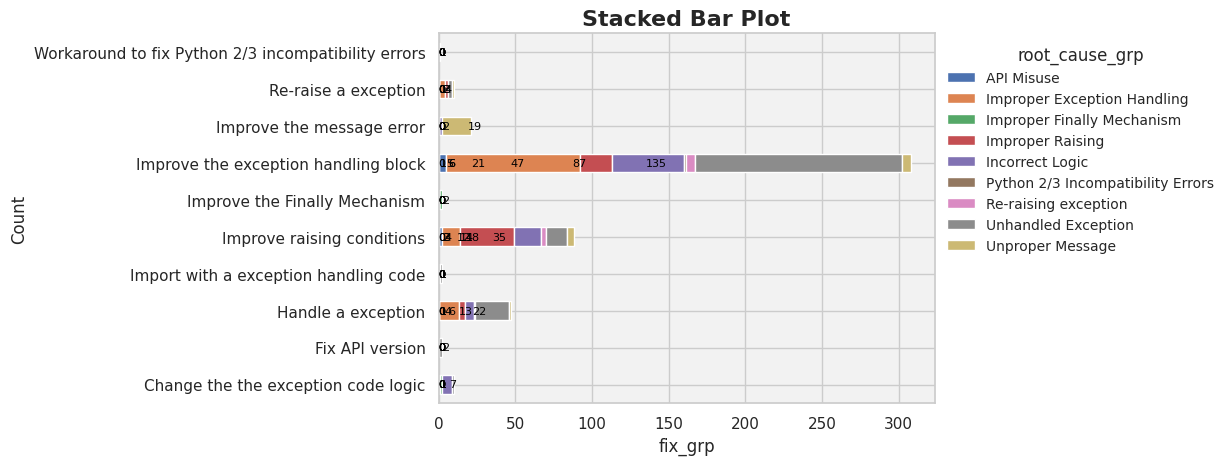

In [ ]:
plot_stacked_bar(df_stacked_rq5, x_col='fix_grp', y_col='root_cause_grp', value_col='Count')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_100_percent_stacked_bar(df, x_col, y_col, value_col):
    # Pivot the DataFrame to have 'x_col' as index, 'y_col' as columns, and 'value_col' as values
    pivot_df = df.pivot(index=x_col, columns=y_col, values=value_col)

    # Normalize the values along each row to get percentages
    pivot_df_percentage = (pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100).round(2)

    #pivot_df_percentage.loc[:, (pivot_df_percentage != 0).any(axis=0)]

    # Create a custom color palette
    custom_palette = sns.color_palette("husl", len(df[y_col].unique()))

    # Create a 100% stacked bar plot using Seaborn with a gray background
    sns.set(style="whitegrid", rc={"axes.facecolor": "#f2f2f2", "legend.frameon": False})
    plt.figure(figsize=(12, 8))
    ax = pivot_df_percentage.plot(kind='barh', stacked=True, edgecolor='w')

    # Add labels and title with a smaller font size
    plt.xlabel("Percentage", fontsize=12)
    plt.ylabel(x_col, fontsize=12)
    plt.title("100% Stacked Bar Plot", fontsize=16, fontweight='bold')

    # Display percentage values on the bars with a smaller font size
    for p in ax.patches:
        width = p.get_width()
        plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='left', va='center', color='black', fontsize=8)

    # Show the legend with a smaller font size
    plt.legend(title=y_col, bbox_to_anchor=(1, 1), fontsize=10, frameon=False)

    # Show the plot
    plt.show()

<Figure size 1200x800 with 0 Axes>

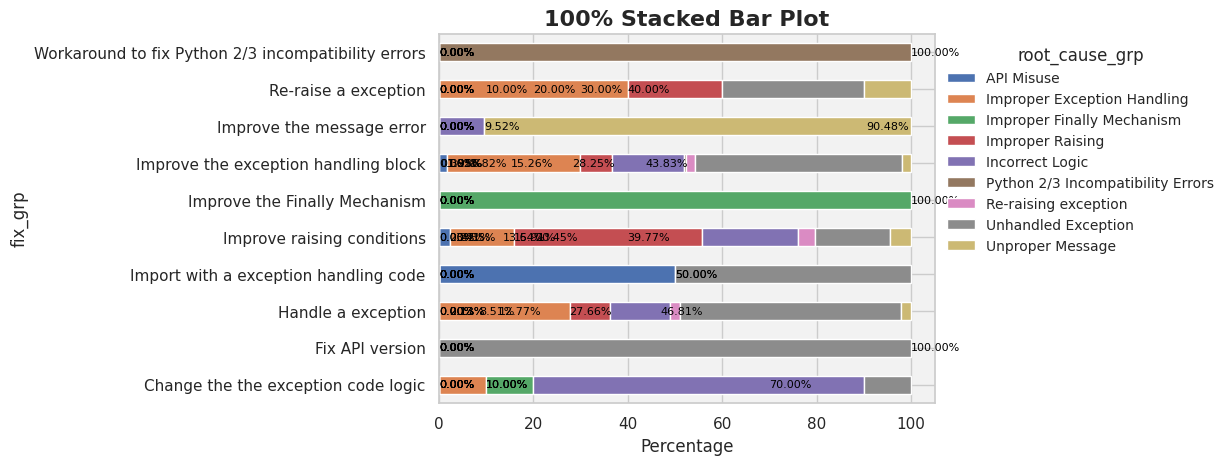

In [ ]:
plot_100_percent_stacked_bar(df_stacked_rq5, x_col='fix_grp', y_col='root_cause_grp', value_col='Count')

In [ ]:
df_stacked_rq5 = df_msr.groupby(by=['root_cause_grp', 'fix_grp']).size().reset_index(name='Count')

In [ ]:
df_stacked_rq5.head(5)

,root_cause_grp,fix_grp,Count
0,API Misuse,Import with a exception handling code,1
1,API Misuse,Improve raising conditions,2
2,API Misuse,Improve the exception handling block,5
3,Improper Exception Handling,Change the the exception code logic,1
4,Improper Exception Handling,Handle a exception,13


In [ ]:
pivot_df = df_stacked_rq5.pivot(index='root_cause_grp', columns='fix_grp', values='Count') 

# Normalize the values along each row to get percentages
pivot_df_percentage = (pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100).round(2)

In [ ]:
pivot_df_percentage.reset_index()

fix_grp,root_cause_grp,Change the the exception code logic,Fix API version,Handle a exception,Import with a exception handling code,Improve raising conditions,Improve the Finally Mechanism,Improve the exception handling block,Improve the message error,Re-raise a exception,Workaround to fix Python 2/3 incompatibility errors
0,API Misuse,NaN,NaN,NaN,12.50,25.00,NaN,62.50,NaN,NaN,NaN
1,Improper Exception Handling,0.85,NaN,11.11,NaN,10.26,NaN,74.36,NaN,3.42,NaN
2,Improper Finally Mechanism,33.33,NaN,NaN,NaN,NaN,66.67,NaN,NaN,NaN,NaN
3,Improper Raising,NaN,NaN,6.45,NaN,56.45,NaN,33.87,NaN,3.23,NaN
4,Incorrect Logic,8.75,NaN,7.50,NaN,22.50,NaN,58.75,2.50,NaN,NaN
5,Python 2/3 Incompatibility Errors,NaN,NaN,NaN,NaN,NaN,NaN,50.00,NaN,NaN,50.0
6,Re-raising exception,NaN,NaN,10.00,NaN,30.00,NaN,60.00,NaN,NaN,NaN
7,Unhandled Exception,0.56,1.12,12.36,0.56,7.87,NaN,75.84,NaN,1.69,NaN
8,Unproper Message,NaN,NaN,3.23,NaN,12.90,NaN,19.35,61.29,3.23,NaN


In [ ]:
pivot_df_percentage.to_csv("files_2/fixes_vs_roots.csv")

#### EH Fixes and Anti-Patterns

In [ ]:
df_patterns = pd.read_csv("files_2/fixes-msr.csv")

In [ ]:
df_patterns.shape

(372, 23)

In [ ]:
df_patterns.head(5)

,author,index,project,commit_fix,url_issue,repo_url,file,function,n_try_pass,n_generic_except,...,n_captures_broad_raise,n_bare_raise_finally,has_smell,exists_anti_pattern,anti_pattern_add,anti_pattern_added_name,anti_pattern_removed,anti_pattern_rem_name,fix_to_only_rem_anti_pattern,comments
0,2,312,pandas,89ad14ddd49287dfed1b4586be2d2f8a3d723868,https://github.com/pandas-dev/pandas/issues/2971,https://github.com/pandas-dev/pandas,2,29,3,5,...,0,0,9,Y,Y,Bare Raise Block,N,NaN,N,NaN
1,2,17,ansible,26fff6f5c32fa4396a8c72872c729b367739499c,https://github.com/ansible/ansible/issues/59527,https://github.com/ansible/ansible,2,32,1,5,...,3,0,9,Y,Y,Too Broad Except,Y,Too Broad Except,N,Marquei que o antipattern foi adicionado e rem...
2,2,337,pipenv,baef2e78a632168bddce0a428969b9f6fb32693c,https://github.com/pypa/pipenv/issues/3017,https://github.com/pypa/pipenv,60,596,20,11,...,3,0,37,N,N,NaN,N,NaN,NaN,Alguns PRs eu marquei em vermelho pelos seguin...
3,2,197,jupyterhub,cb25d29b0bab438b5fd68b92036e0e25134b7ace,https://github.com/jupyterhub/jupyterhub/issue...,https://github.com/jupyterhub/jupyterhub,1,1,0,1,...,0,0,1,Y,Y,Try and Return,Y,Try and Return,N,NaN
4,2,189,ipython,811d52cc05312485b22c67b07d9161eb42c60646,https://github.com/ipython/ipython/issues/5790,https://github.com/ipython/ipython,2,68,4,6,...,0,0,15,Y,Y,Swallowing Exceptions,Y,Swallowing Exceptions,N,NaN


In [ ]:
df_patterns.groupby(["exists_anti_pattern", "anti_pattern_add", "anti_pattern_removed"]).size().reset_index()

,exists_anti_pattern,anti_pattern_add,anti_pattern_removed,0
0,N,N,N,153
1,Y,N,Y,95
2,Y,Y,N,63
3,Y,Y,Y,61


In [ ]:
df_patterns.groupby(["fix_to_only_rem_anti_pattern"]).size().reset_index()

,fix_to_only_rem_anti_pattern,0
0,N,111
1,Y,4


In [ ]:
df_patterns.groupby(["exists_anti_pattern"]).size().reset_index()

,exists_anti_pattern,0
0,N,153
1,Y,219


In [ ]:
df_patterns.groupby(["exists_anti_pattern", "anti_pattern_rem_name"]).size().reset_index()

,exists_anti_pattern,anti_pattern_rem_name,0
0,Y,Bare Except Catch Block,2
1,Y,Bare Raise Block,22
2,Y,"Bare Raise Block, Too Broad Except",2
3,Y,Bare except,9
4,Y,"Bare except,Too Broad Except",14
5,Y,Swallowing Exceptions,13
6,Y,Too Broad Except,59
7,Y,"Too Broad Except, Swallowing Exceptions",1
8,Y,Try and Return,1
9,Y,too-many-nested-blocks,5


In [ ]:
df_patterns.groupby(["exists_anti_pattern", "anti_pattern_added_name"]).size().reset_index()

,exists_anti_pattern,anti_pattern_added_name,0
0,Y,Bare Except Catch Block,8
1,Y,Bare Raise Block,38
2,Y,"Bare Raise Block, Swallowing Exceptions",2
3,Y,"Bare Raise Block, Swallowing Exceptions, Bare ...",1
4,Y,"Bare Raise Block, Too Broad Except",4
5,Y,Bare except,12
6,Y,Swallowing Exceptions,19
7,Y,"Swallowing Exceptions, Bare Raise Block",2
8,Y,"Swallowing Exceptions, Too Broad Except",1
9,Y,Too Broad Except,33


In [ ]:
result_df = pd.merge(df_msr, df_patterns, left_on=['project', 'hash'], right_on=['project', 'commit_fix'], how='inner')

In [ ]:
result_df_site = pd.merge(df_msr, df_patterns, left_on=['project', 'hash'], right_on=['project', 'commit_fix'], how='left')

In [ ]:
result_df_site.shape

(864, 48)

In [ ]:
result_df_site.to_csv("files_2/dataset.csv")

In [ ]:
len(result_df_site.project.unique())

136

In [ ]:
result_df.anti_pattern_added_name.unique()

array(['Swallowing Exceptions', nan, 'Bare Raise Block, Too Broad Except',
       'Bare Except Catch Block', 'Bare Raise Block', 'Too Broad Except',
       'Try and Return', 'Bare except',
       'Bare Raise Block, Swallowing Exceptions',
       'Swallowing Exceptions, Bare Raise Block',
       'Bare Raise Block, Swallowing Exceptions, Bare Except Catch Block',
       'Too Broad Except, Swallowing Exceptions',
       'Swallowing Exceptions, Too Broad Except',
       'too-many-nested-blocks',
       'Too Broad Except, Bare Except Catch Block'], dtype=object)

In [ ]:
result_df.anti_pattern_rem_name.unique()

array([nan, 'Bare except,Too Broad Except', 'Too Broad Except',
       'too-many-nested-blocks', 'Swallowing Exceptions',
       'too-many-nested-blocks,Bare except,Too Broad Except',
       'Bare Except Catch Block', 'Bare Raise Block',
       'too-many-nested-blocks,Bare except,Too Broad Except,Bare raise block',
       'Bare Raise Block, Too Broad Except', 'Try and Return',
       'too-many-nested-blocks,Bare except', 'Bare except',
       'too-many-nested-blocks,Too Broad Except',
       'Too Broad Except, Swallowing Exceptions',
       'too-many-nested-blocks,Too Broad Except,Bare raise block'],
      dtype=object)

In [ ]:
# Function to concatenate non-NaN values
def remove_nan_from_list(lst):
    return [item for item in lst if pd.notna(item) and item != '']

result_df['v_anti_pattern_modif_name'] = result_df[['anti_pattern_added_name', 'anti_pattern_rem_name']].fillna('').agg(','.join, axis=1)



result_df['v_anti_pattern_added_name'] = result_df['anti_pattern_added_name'].str.split(',')
result_df['v_anti_pattern_rem_name'] = result_df['anti_pattern_rem_name'].str.split(',')
result_df['v_anti_pattern_modif_name'] = result_df['v_anti_pattern_modif_name'].str.split(',')

result_df['v_anti_pattern_modif_name'] = result_df['v_anti_pattern_modif_name'].apply(remove_nan_from_list)

In [ ]:
result_df[result_df['exists_anti_pattern'] == 'Y'].head(2)

,project,author_x,type,issue_number,commit_msg,author_name,author_date,merge,issue_labels,url_issue_x,...,exists_anti_pattern,anti_pattern_add,anti_pattern_added_name,anti_pattern_removed,anti_pattern_rem_name,fix_to_only_rem_anti_pattern,comments,v_anti_pattern_modif_name,v_anti_pattern_added_name,v_anti_pattern_rem_name
0,pillow,1,issue,2359,merge pull request #2359 from wiredfool/issue_...,wiredfool,2017-01-26 14:12:32+00:00,True,Bug,https://github.com/python-pillow/pillow/issues...,...,Y,Y,Swallowing Exceptions,N,NaN,N,NaN,[Swallowing Exceptions],[Swallowing Exceptions],NaN
1,pandas,1,issue,1778,bug: fix date_range generation issues with dst...,Wes McKinney,2012-08-18 19:35:32-04:00,False,Bug,https://github.com/pandas-dev/pandas/issues/1778,...,Y,N,NaN,Y,"Bare except,Too Broad Except",NaN,foi removida a linha com antipattern Too Broad...,"[Bare except, Too Broad Except]",NaN,"[Bare except, Too Broad Except]"


In [ ]:
result_df.shape

(372, 51)

In [ ]:
df_explode = result_df.explode('v_anti_pattern_modif_name').reset_index(drop=True)

In [ ]:
df_explode.columns

Index(['project', 'author_x', 'type', 'issue_number', 'commit_msg',
       'author_name', 'author_date', 'merge', 'issue_labels', 'url_issue_x',
       'has_buggy', 'exception_bug', 'symptom', 'root_cause', 'fix',
       'has_smell_x', 'has_test in_fix', 'symptom_adj', 'symptom_map',
       'symptom_grp', 'root_cause_adj', 'root_cause_map', 'root_cause_grp',
       'fix_adj', 'fix_map', 'fix_grp', 'author_y', 'index', 'commit_fix',
       'url_issue_y', 'repo_url', 'file', 'function', 'n_try_pass',
       'n_generic_except', 'n_nested_try', 'n_bare_except',
       'n_captures_misplaced_bare_raise', 'n_captures_broad_raise',
       'n_bare_raise_finally', 'has_smell_y', 'exists_anti_pattern',
       'anti_pattern_add', 'anti_pattern_added_name', 'anti_pattern_removed',
       'anti_pattern_rem_name', 'fix_to_only_rem_anti_pattern', 'comments',
       'v_anti_pattern_modif_name', 'v_anti_pattern_added_name',
       'v_anti_pattern_rem_name'],
      dtype='object')

In [ ]:
df_explode["v_anti_pattern_modif_name"] = df_explode["v_anti_pattern_modif_name"].str.strip()

In [ ]:
df_grp = df_explode.groupby(["fix_grp", "v_anti_pattern_modif_name"]).size().reset_index(name="Count").sort_values("Count", ascending=False)

In [ ]:
pivot_df = df_grp.pivot(index='fix_grp', columns='v_anti_pattern_modif_name', values='Count') 

# Normalize the values along each row to get percentages
pivot_df_percentage = (pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100).round(2)

In [ ]:
pivot_df_percentage

v_anti_pattern_modif_name,Bare Except Catch Block,Bare Raise Block,Bare except,Bare raise block,Swallowing Exceptions,Too Broad Except,Try and Return,too-many-nested-blocks
fix_grp,,,,,,,,
Change the the exception code logic,NaN,50.00,NaN,NaN,NaN,33.33,NaN,16.67
Fix API version,NaN,NaN,66.67,NaN,NaN,33.33,NaN,NaN
Handle a exception,2.50,17.50,7.50,NaN,27.50,37.50,NaN,7.50
Improve raising conditions,2.33,46.51,9.30,NaN,6.98,32.56,NaN,2.33
Improve the Finally Mechanism,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN
Improve the exception handling block,4.29,16.31,15.45,1.29,11.16,40.34,0.86,10.30
Improve the message error,NaN,13.33,13.33,NaN,NaN,46.67,NaN,26.67
Re-raise a exception,NaN,12.50,NaN,NaN,NaN,75.00,NaN,12.50


In [ ]:
pivot_df_percentage.to_csv("files_2/rq6.csv")

In [ ]:
df_piv = df_grp.pivot(index="fix_grp", columns="v_anti_pattern_modif_name", values="Count").reset_index()
df_piv

v_anti_pattern_modif_name,fix_grp,Bare Except Catch Block,Bare Raise Block,Bare except,Bare raise block,Swallowing Exceptions,Too Broad Except,Try and Return,too-many-nested-blocks
0,Change the the exception code logic,NaN,3.0,NaN,NaN,NaN,2.0,NaN,1.0
1,Fix API version,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN
2,Handle a exception,1.0,7.0,3.0,NaN,11.0,15.0,NaN,3.0
3,Improve raising conditions,1.0,20.0,4.0,NaN,3.0,14.0,NaN,1.0
4,Improve the Finally Mechanism,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
5,Improve the exception handling block,10.0,38.0,36.0,3.0,26.0,94.0,2.0,24.0
6,Improve the message error,NaN,2.0,2.0,NaN,NaN,7.0,NaN,4.0
7,Re-raise a exception,NaN,1.0,NaN,NaN,NaN,6.0,NaN,1.0


In [ ]:
df_explode.groupby(["v_anti_pattern_modif_name"]).size().reset_index(name="Count").sort_values("Count", ascending=False)

,v_anti_pattern_modif_name,Count
5,Too Broad Except,142
1,Bare Raise Block,71
2,Bare except,47
4,Swallowing Exceptions,40
7,too-many-nested-blocks,34
0,Bare Except Catch Block,12
3,Bare raise block,3
6,Try and Return,2


In [ ]:
df_explode.groupby(["v_anti_pattern_modif_name"]).size().reset_index(name="Count").sort_values("Count", ascending=False).sum()

v_anti_pattern_modif_name    Too Broad ExceptBare Raise BlockBare exceptSwa...
Count                                                                      351
dtype: object

In [ ]:
df_explode.groupby(["v_anti_pattern_modif_name"]).size().reset_index(name="Count").sort_values("Count", ascending=False).to_csv("files_2/rq6_count.csv")